<b>Dataset Information</b>

1. TV, Radio, Newspaper : Independent variable
2. Price : Dependent variable we want to predict using ML

### Import library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### Load datasets

In [2]:
df = pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


### Sneak peak data

In [3]:
#Get the top 5 record
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [4]:
#Checking dimension of dataset
#Our dataset has 4 columns and 200 rows
df.shape

(200, 4)

In [5]:
#Checking For datatypes of the attributes (sum of data, datatype and memory usage)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [6]:
#Checking descriptive statistics
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Handling Missing Value

In [7]:
#Checking for null values
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

### Handling Duplicate Value

In [8]:
#Checking for duplicate rows
df[df.duplicated()]

,TV,Radio,Newspaper,Sales


No duplicate value on our dataset

### Exploratory Data Analysis (EDA)

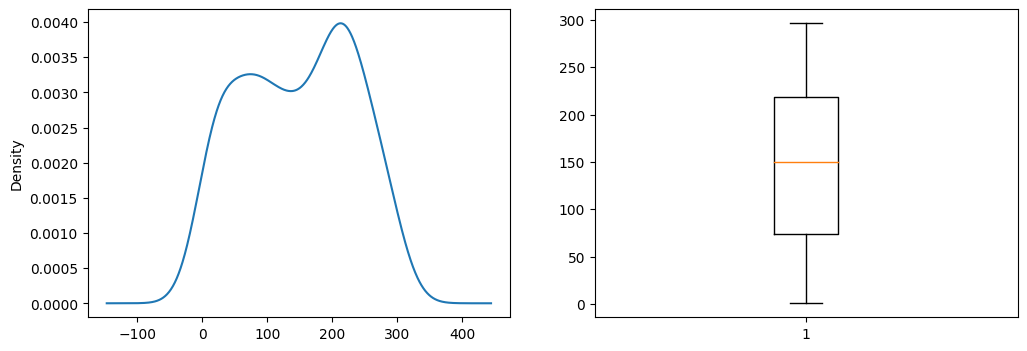

In [9]:
#Univariate analysis TV
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['TV'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['TV'])
plt.show()

<ul>
<li>Highest "TV" density is about 200
<li>Almost like normal distribution, but with high standard deviation 
<li>There is no outlier


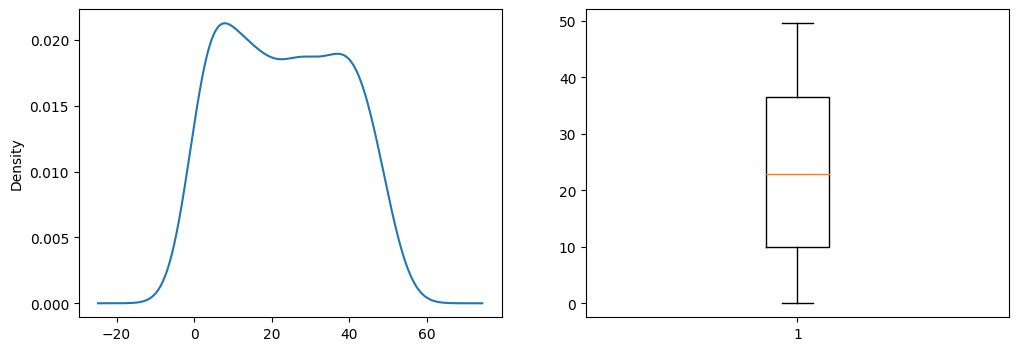

In [10]:
#Univariate analysis Radio
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Radio'].plot(kind='kde')

f.add_subplot(1,2,2)
plt.boxplot(df['Radio'])
plt.show()

<ul>
<li>Highest "Radio" density is about 10
<li>Almost like normal distribution, but with high standard deviation 
<li>There is no outlier

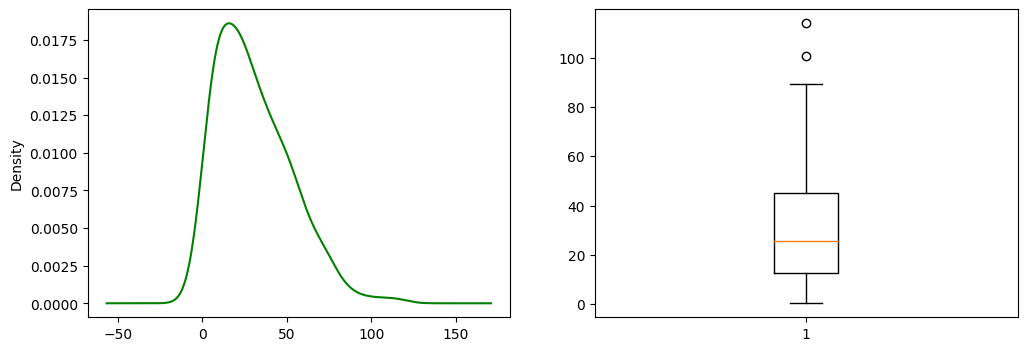

In [27]:
#Univariate analysis Newspaper
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Newspaper'].plot(kind='kde', c='g')

f.add_subplot(1,2,2)
plt.boxplot(df['Newspaper'])
plt.show()

<ul>
<li>Highest "Newpaper" density is about 20
<li>Almost like normal distribution with right skew, but with high standard deviation
<li>There is 2 outliers

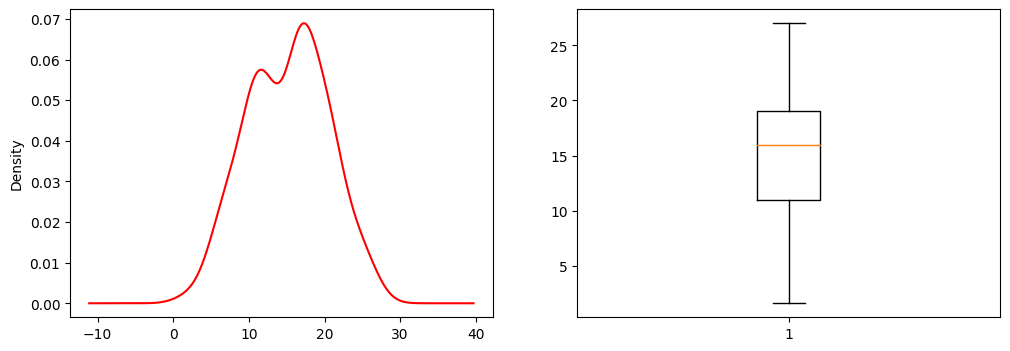

In [28]:
#Univariate analysis Sales
f = plt.figure(figsize=(12,4))

f.add_subplot(1,2,1)
df['Sales'].plot(kind='kde', c='r')

f.add_subplot(1,2,2)
plt.boxplot(df['Sales'])
plt.show()

<ul>
<li>Highest "Sales" density is about 15-20
<li>Almost like normal distribution with right skew, but with high standard deviation
<li>There is no outliers

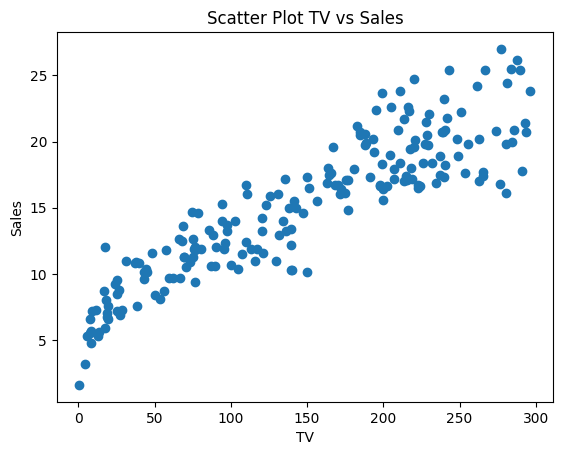

In [13]:
#Bivariate analysis TV and Sales using scatter plot
plt.scatter(df['TV'], df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Scatter Plot TV vs Sales')
plt.show()

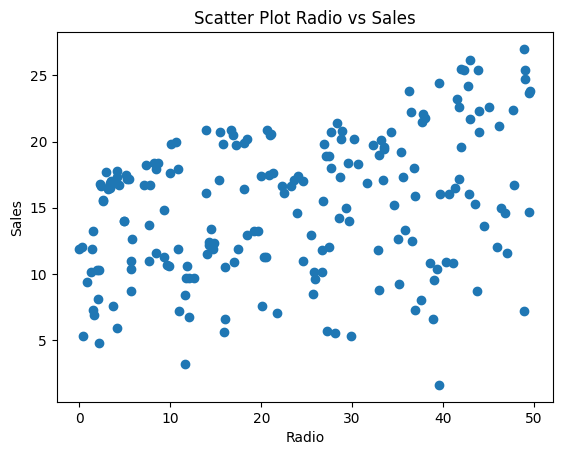

In [14]:
#Bivariate analysis Radio and Sales using scatter plot
plt.scatter(df['Radio'], df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
plt.title('Scatter Plot Radio vs Sales')
plt.show()

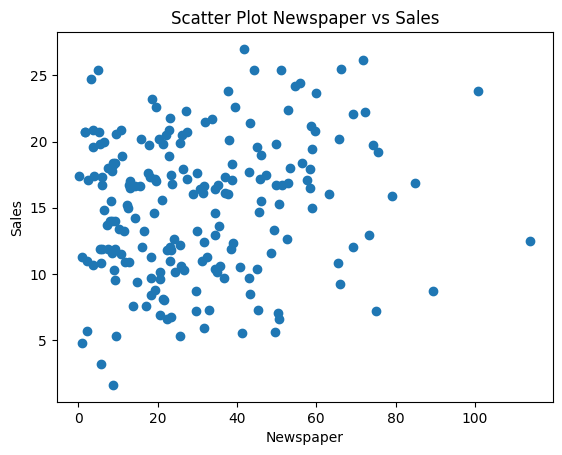

In [15]:
#Bivariate analysis Newspaper and Sales using scatter plot
plt.scatter(df['Newspaper'], df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
plt.title('Scatter Plot Newspaper vs Sales')
plt.show()

<ul>
<li>TV and Sales have significant positive correlation
<li>The higher TV, the higher Sales


In [16]:
#Check the correlation off all feature
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


<ul>
<li>The highest correlation is between TV and Sales with value 0.901208


### Modelling

In [17]:
#First, create new x and y variable
x = df['TV'].values.reshape(-1,1)
y = df['Sales'].values.reshape(-1,1)

In [18]:
#Split data into training and testing with proportion 80:20
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 1)

In [19]:
#Create Linear Regression model
regressor = LinearRegression()

In [20]:
#Train model
regressor.fit(x_train, y_train)

LinearRegression()

In [21]:
#get slope value and intercept
print(regressor.coef_)
print(regressor.intercept_)

[[0.05643984]]
[6.81903463]


In [22]:
#Check model accuracy
regressor.score(x_test, y_test)

0.7241962282650848

<ul>
<li>Our model get 72.4196 % accuracy

Text(0.5, 1.0, 'Plot TV vs Sales')

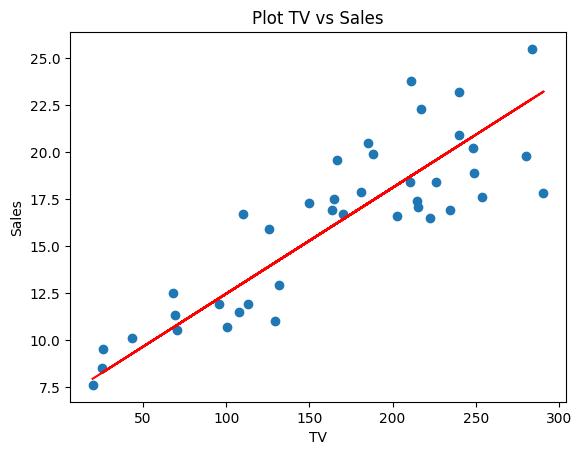

In [23]:
#Visualize regression line in scatter plot
y_predict = regressor.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_predict, c='r')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Plot TV vs Sales')

### Prediction

In [24]:
#Price prediction with TV 100
regressor.predict([[100]])

array([[12.46301823]])

In [25]:
#Price prediction with TV 150
regressor.predict([[150]])

array([[15.28501004]])

In [26]:
#Price prediction with TV 200
regressor.predict([[200]])

array([[18.10700184]])

### Conslusion
<ul>
<li> It means our hipothesys is true that the higher TV price, the higher Sales also.